In [ ]:
import pandas as pd
import re
from konlpy.tag import Okt

import numpy as np


In [2]:
review = pd.read_csv("merged_data_with_university.csv")

In [3]:
# 감성어 사전 불러오기 및 처리
sentiment_data = pd.read_csv('KnuSentiLex/SentiWord_Dict.txt', sep='\t', header=None, names=['단어', '극성'])
sentiment_dictionary = sentiment_data.set_index('단어')['극성'].to_dict()  # 사전 형태로 변환

# 형태소 분석

In [4]:
# 리뷰 텍스트 전처리 함수
def preprocess_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', text)  # 한글과 공백만 남기기
    return text.strip()

# 전처리 적용
review['리뷰 텍스트'] = review['리뷰 텍스트'].apply(lambda x: preprocess_text(str(x)))

In [15]:
okt = Okt()
# 명사 추출 함수
def extract_nouns(text):
    try:
        pos_list = okt.pos(text, norm=True, stem=True)
        nouns = [word for word, tag in pos_list if tag == 'Noun']
        return ' '.join(nouns)
    except Exception as e:
        print(f"Error processing text: {text} - {e}")
        return ''

# 형용사 추출 함수
def extract_adjectives(text):
    try:
        pos_list = okt.pos(text, norm=True, stem=True)
        adjectives = [word for word, tag in pos_list if tag == 'Adjective']
        return ' '.join(adjectives)
    except Exception as e:
        print(f"Error processing text: {text} - {e}")
        return ''

# 명사 컬럼 추가
review['명사'] = review['리뷰 텍스트'].apply(lambda x: extract_nouns(str(x)))

# 형용사 컬럼 추가
review['형용사'] = review['리뷰 텍스트'].apply(lambda x: extract_adjectives(str(x)))

# 결과 확인
print(review[['리뷰 텍스트', '명사', '형용사']].head())

                                              리뷰 텍스트  \
0  서울권에 있는 카페 거의 다가봤는데 개인적으로 등 티어입니다 친구들 회기오면 무조건...   
1  분위기도 좋은데 커피가 너무 맛있어요 디카페인커피는 경험상 일반 아메리카노보다 맛이...   
2  오랫만에 왔는데 여전히 커피도 맛있네요 시나몬카푸치노였는데 은은한 시나몬향과 살짝 ...   
3  한번 와보고 싶었던 곳인데 드디어 와봅니다\n판나코타 궁금했는데 이건 인 개 주문해...   
4  오늘 일카페\n동생이 경희대 근처 커피집 다 이쁘고 맛나다고 ㅋ\n지나가다 봐둔 카...   

                                                  명사  \
0  서울 카페 거의 다가 개인 등 티어 친구 회 기오 무조건 데리 심지어 명 멀리사 데...   
1  분위기 커피 디카 페인 커피 경험 일반 아메리카노 맛 안 밤 수 조용조 단골 듯 곳...   
2  만 커피 시나몬 카푸치노 시나몬 향 살짝 단맛 커피 오늘 비 더 자주 근처 병원 때...   
3  한번 보고 곳 판나코타 것 인 개 주문 요 순삭 다른 디저트 휘 낭시 초코 티그레 ...   
4  오늘 카페 동생 경희대 근처 커피집 맛 카페 또 저 고가 보기 동네 혼자 못 여기 ...   

                                                 형용사  
0  있다 이다 좋아하다 비싸다 같다 저렴하다 따뜻하다 중요하다 맛있다 싫어하다 좋아하다...  
1                좋다 맛있다 덜하다 맛있다 용하다 많다 맛있다 좋다 같다 맛있다  
2                           여전하다 맛있다 은은하다 그렇다 맛있다 있다  
3  궁금하다 부드럽다 적당하다 궁금하다 없다 아쉽다 강하다 좋아하다 아니다 그렇다 없다...  
4        이쁘다 재미있다 차분하다 좋다 굳다 굳다 좋아하다 신기하다 달콤하다 굳다 굳

In [16]:
# 저장
review.to_csv('review_with_nouns_adjectives.csv', index=False, encoding='utf-8-sig')

In [19]:
review = pd.read_csv('review_with_nouns_adjectives.csv')
review.head()

,대학교 이름,가게 이름,가게 평균 평점,리뷰어 리뷰수,리뷰 텍스트,리뷰 날짜,가게 방문수,태그들,명사,형용사
0,서울시립대학교,컴투레스트,4.55,326,서울권에 있는 카페 거의 다가봤는데 개인적으로 등 티어입니다 친구들 회기오면 무조건...,11.11.월,7,"커피가 맛있어요, 디저트가 맛있어요, 특별한 메뉴가 있어요, 아늑해요, 차분한 분위기에요",서울 카페 거의 다가 개인 등 티어 친구 회 기오 무조건 데리 심지어 명 멀리사 데...,있다 이다 좋아하다 비싸다 같다 저렴하다 따뜻하다 중요하다 맛있다 싫어하다 좋아하다...
1,서울시립대학교,컴투레스트,4.55,514,분위기도 좋은데 커피가 너무 맛있어요 디카페인커피는 경험상 일반 아메리카노보다 맛이...,10.26.토,1,"커피가 맛있어요, 디저트가 맛있어요",분위기 커피 디카 페인 커피 경험 일반 아메리카노 맛 안 밤 수 조용조 단골 듯 곳...,좋다 맛있다 덜하다 맛있다 용하다 많다 맛있다 좋다 같다 맛있다
2,서울시립대학교,컴투레스트,4.55,379,오랫만에 왔는데 여전히 커피도 맛있네요 시나몬카푸치노였는데 은은한 시나몬향과 살짝 ...,10.22.화,1,"커피가 맛있어요, 대화하기 좋아요",만 커피 시나몬 카푸치노 시나몬 향 살짝 단맛 커피 오늘 비 더 자주 근처 병원 때...,여전하다 맛있다 은은하다 그렇다 맛있다 있다
3,서울시립대학교,컴투레스트,4.55,97,한번 와보고 싶었던 곳인데 드디어 와봅니다\n판나코타 궁금했는데 이건 인 개 주문해...,7.25.목,1,"디저트가 맛있어요, 특별한 메뉴가 있어요, 인테리어가 멋져요, 아늑해요",한번 보고 곳 판나코타 것 인 개 주문 요 순삭 다른 디저트 휘 낭시 초코 티그레 ...,궁금하다 부드럽다 적당하다 궁금하다 없다 아쉽다 강하다 좋아하다 아니다 그렇다 없다...
4,서울시립대학교,컴투레스트,4.55,324,오늘 일카페\n동생이 경희대 근처 커피집 다 이쁘고 맛나다고 ㅋ\n지나가다 봐둔 카...,7.4.목,1,"커피가 맛있어요, 인테리어가 멋져요, 사진이 잘 나와요, 대화하기 좋아요, 차분한 ...",오늘 카페 동생 경희대 근처 커피집 맛 카페 또 저 고가 보기 동네 혼자 못 여기 ...,이쁘다 재미있다 차분하다 좋다 굳다 굳다 좋아하다 신기하다 달콤하다 굳다 굳다


In [28]:
def lemmatize(sentence):
    if not isinstance(sentence, str):  # 문자열이 아닌 경우 빈 리스트 반환
        print(f"Invalid input detected: {sentence}")
        return []

    try:
        # 형태소 분석 및 태그 추출
        morphtags = okt.pos(sentence, norm=True, stem=True)
        words = []
        for word, tag in morphtags:
            if tag == 'Noun':  # 명사
                words.append(word)
            elif tag in ['Adjective', 'Verb']:  # 형용사와 동사
                if not word.endswith('다'):  # '다'가 이미 붙어 있지 않은 경우에만 추가
                    word += '다'
                words.append(word)
        return words
    except Exception as e:
        print(f"Error processing text: {sentence} - {e}")
        return []

In [29]:
word = lemmatize(review.iloc[0]['리뷰 텍스트'])
print(word)

['서울', '있다', '카페', '거의', '다가', '보다', '개인', '등', '티어', '이다', '친구', '회', '기오', '무조건', '데리', '가다', '좋아하다', '심지어', '명', '멀리사', '데', '여기다', '싶다', '회기', '옴', '가격', '더', '비싸다', '되다', '같다', '학생', '주머니', '사정', '때문', '저렴하다', '판매', '하다', '장님', '공간', '따뜻하다', '치유', '받다', '곳', '가장', '중요하다', '음료', '디저트', '맛있다', '우리', '집', '고양이', '나가다', '싫어하다', '여기', '카페', '장님', '좋아하다', '정말', '기묘하다', '장소']


In [31]:
# NaN 값 및 문자열 변환 적용
review['리뷰 텍스트'] = review['리뷰 텍스트'].fillna('').astype(str)

# '리뷰 텍스트' 컬럼에 Lemmatize 적용
w_ = []
for i in range(len(review)):
    words = lemmatize(review.iloc[i]['리뷰 텍스트'])
    w_.append(' '.join(words))  # 단어를 공백으로 연결하여 저장

# 결과를 'words' 컬럼에 저장
review['words'] = w_

In [32]:
print(review[['리뷰 텍스트', 'words']].head())

                                              리뷰 텍스트  \
0  서울권에 있는 카페 거의 다가봤는데 개인적으로 등 티어입니다 친구들 회기오면 무조건...   
1  분위기도 좋은데 커피가 너무 맛있어요 디카페인커피는 경험상 일반 아메리카노보다 맛이...   
2  오랫만에 왔는데 여전히 커피도 맛있네요 시나몬카푸치노였는데 은은한 시나몬향과 살짝 ...   
3  한번 와보고 싶었던 곳인데 드디어 와봅니다\n판나코타 궁금했는데 이건 인 개 주문해...   
4  오늘 일카페\n동생이 경희대 근처 커피집 다 이쁘고 맛나다고 ㅋ\n지나가다 봐둔 카...   

                                               words  
0  서울 있다 카페 거의 다가 보다 개인 등 티어 이다 친구 회 기오 무조건 데리 가다...  
1  분위기 좋다 커피 맛있다 디카 페인 커피 경험 일반 아메리카노 맛 덜하다 안 마시다...  
2  만 오다 여전하다 커피 맛있다 시나몬 카푸치노 이다 은은하다 시나몬 향 살짝 단맛 ...  
3  한번 오다 보고 싶다 곳 오다 보다 판나코타 궁금하다 것 인 개 주문 하다 되다 요...  
4  오늘 카페 동생 경희대 근처 커피집 이쁘다 맛 나다 지나가다 보다 두다 카페 또 가...  


In [33]:
# 감성 점수 계산 및 데이터프레임에 추가
total = []

for i, w in enumerate(review['words']):  # review 데이터프레임 사용
    sent_score = 0
    valid_word_count = 0  # 감성어 사전에 포함된 유효 단어 수
    w = w.split(' ')  # 단어를 공백으로 분리

    for j in w:
        if len(j) <= 1:  # 단어 길이가 1 이하인 경우 무시
            continue
        elif j not in sentiment_dictionary:  # 감성어 사전에 없는 단어 무시
            continue
        else:
            sent_score += float(sentiment_dictionary[j])  # 감성 점수 합산
            valid_word_count += 1

    # 유효 단어가 없으면 점수는 0, 그렇지 않으면 평균 계산
    if valid_word_count == 0:
        total.append(0)
    else:
        total.append(sent_score / valid_word_count)

# 결과를 'sent_score' 컬럼에 저장
review['sent_score'] = total

# 감성 점수가 0인 리뷰 제거
filtered_review = review[review['sent_score'] != 0]

# 결과 확인
print(filtered_review[['리뷰 텍스트', 'words', 'sent_score']].head())

# 결과 저장
filtered_review.to_csv('filtered_review_with_sentiment_scores.csv', index=False, encoding='utf-8-sig')

                                              리뷰 텍스트  \
0  서울권에 있는 카페 거의 다가봤는데 개인적으로 등 티어입니다 친구들 회기오면 무조건...   
1  분위기도 좋은데 커피가 너무 맛있어요 디카페인커피는 경험상 일반 아메리카노보다 맛이...   
2  오랫만에 왔는데 여전히 커피도 맛있네요 시나몬카푸치노였는데 은은한 시나몬향과 살짝 ...   
3  한번 와보고 싶었던 곳인데 드디어 와봅니다\n판나코타 궁금했는데 이건 인 개 주문해...   
4  오늘 일카페\n동생이 경희대 근처 커피집 다 이쁘고 맛나다고 ㅋ\n지나가다 봐둔 카...   

                                               words  sent_score  
0  서울 있다 카페 거의 다가 보다 개인 등 티어 이다 친구 회 기오 무조건 데리 가다...    0.800000  
1  분위기 좋다 커피 맛있다 디카 페인 커피 경험 일반 아메리카노 맛 덜하다 안 마시다...    1.875000  
2  만 오다 여전하다 커피 맛있다 시나몬 카푸치노 이다 은은하다 시나몬 향 살짝 단맛 ...    2.000000  
3  한번 오다 보고 싶다 곳 오다 보다 판나코타 궁금하다 것 인 개 주문 하다 되다 요...    0.454545  
4  오늘 카페 동생 경희대 근처 커피집 이쁘다 맛 나다 지나가다 보다 두다 카페 또 가...    1.666667  


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트를 AppleGothic으로 설정
mpl.rc('font', family='AppleGothic')

# 음수 폰트가 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

# 감성 범주 추가
def categorize_sentiment(score):
    if score > 0:
        return '긍정'
    elif score < 0:
        return '부정'
    else:
        return '중립'

review['sentiment'] = review['sent_score'].apply(categorize_sentiment)

# 감성 분포 출력
sentiment_distribution = review['sentiment'].value_counts()
print(sentiment_distribution)

sentiment
긍정    87745
중립    25135
부정     2937
Name: count, dtype: int64


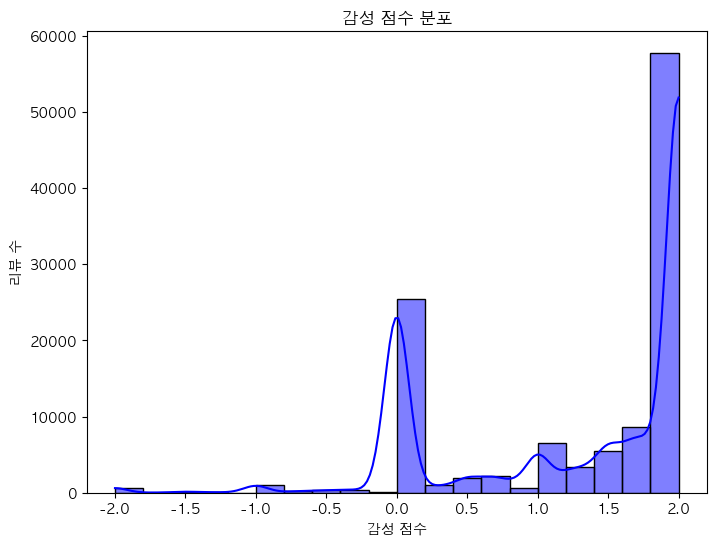

In [39]:
# 히스토그램 시각화
plt.figure(figsize=(8, 6))
sns.histplot(review['sent_score'], bins=20, kde=True, color='blue')
plt.title('감성 점수 분포')
plt.xlabel('감성 점수')
plt.ylabel('리뷰 수')
plt.show()

/var/folders/nz/glbk0zl17d35x39jy85r5vhc0000gn/T/ipykernel_73668/1775973485.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=review, x='sentiment', palette='pastel')


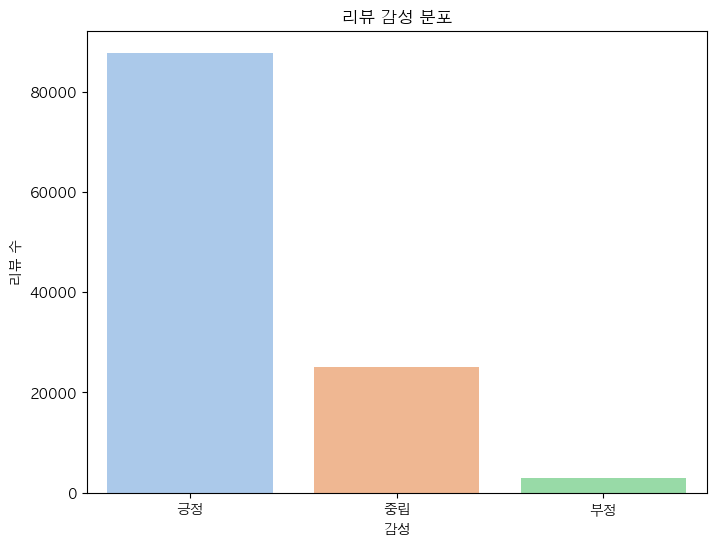

In [40]:
# 막대그래프 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=review, x='sentiment', palette='pastel')
plt.title('리뷰 감성 분포')
plt.xlabel('감성')
plt.ylabel('리뷰 수')
plt.show()